In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load Data
data = pd.read_csv('/content/sample_data/cardio_data.csv')

# Check for Missing Values
missing_values = data.isna().sum()
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64


In [ ]:
#Convert Age from Days to Years
data['age_in_years'] = data['age'] / 365

# You can round the years to a more readable format if needed
data['age_in_years'] = data['age_in_years'].round(0)

# Print the first few rows to verify the change
print(data.head())

         date    country  id  active    age  alco  ap_hi  ap_lo  cholesterol  \
0    3/5/2021  Indonesia   0       1  18393     0    110     80            1   
1    5/8/2021   Malaysia   1       1  20228     0    140     90            3   
2  13-11-2022  Indonesia   2       0  18857     0    130     70            3   
3  31-10-2018  Singapore   3       1  17623     0    150    100            1   
4  25-09-2020  Singapore   4       0  17474     0    100     60            1   

   gender  gluc  height  occupation  smoke  weight  disease  age_in_years  
0       2     1     168   Architect      0    62.0        0          50.0  
1       1     1     156  Accountant      0    85.0        1          55.0  
2       1     1     165        Chef      0    64.0        1          52.0  
3       2     1     169      Lawyer      0    82.0        1          48.0  
4       1     1     156   Architect      0    56.0        0          48.0  


In [ ]:
# Remove Unnecessary Columns
data = data.drop(columns=['date','age','id'])

# Rename the Column
data = data.rename(columns={'age_in_years': 'age'})

# Print the first few rows to verify the change
print(data.head())


     country  active  alco  ap_hi  ap_lo  cholesterol  gender  gluc  height  \
0  Indonesia       1     0    110     80            1       2     1     168   
1   Malaysia       1     0    140     90            3       1     1     156   
2  Indonesia       0     0    130     70            3       1     1     165   
3  Singapore       1     0    150    100            1       2     1     169   
4  Singapore       0     0    100     60            1       1     1     156   

   occupation  smoke  weight  disease   age  
0   Architect      0    62.0        0  50.0  
1  Accountant      0    85.0        1  55.0  
2        Chef      0    64.0        1  52.0  
3      Lawyer      0    82.0        1  48.0  
4   Architect      0    56.0        0  48.0  


In [ ]:
# Calculate BMI
# Convert height from cm to m
data['height_m'] = data['height'] / 100

# Calculate BMI using the formula
data['BMI'] = data['weight'] / (data['height_m'] ** 2)

# Round BMI to 2 decimal places
data['BMI'] = data['BMI'].round(2)

# Drop the temporary 'height_m' column as it's no longer needed
data = data.drop(columns=['height_m'])

# Save the Cleaned Data to a New CSV File
data.to_csv('/content/sample_data/cardio_data_cleaned.csv', index=False)

# Print the first few rows to verify the change
print(data.head())


     country  active  alco  ap_hi  ap_lo  cholesterol  gender  gluc  height  \
0  Indonesia       1     0    110     80            1       2     1     168   
1   Malaysia       1     0    140     90            3       1     1     156   
2  Indonesia       0     0    130     70            3       1     1     165   
3  Singapore       1     0    150    100            1       2     1     169   
4  Singapore       0     0    100     60            1       1     1     156   

   occupation  smoke  weight  disease   age    BMI  
0   Architect      0    62.0        0  50.0  21.97  
1  Accountant      0    85.0        1  55.0  34.93  
2        Chef      0    64.0        1  52.0  23.51  
3      Lawyer      0    82.0        1  48.0  28.71  
4   Architect      0    56.0        0  48.0  23.01  


In [ ]:
# Load cleaned Data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned.csv')

# Print the first few rows to verify the change
print(data.describe())


             active          alco         ap_hi         ap_lo   cholesterol  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.803729      0.053771    128.817286     96.630414      1.366871   
std        0.397179      0.225568    154.011419    188.472530      0.680250   
min        0.000000      0.000000   -150.000000    -70.000000      1.000000   
25%        1.000000      0.000000    120.000000     80.000000      1.000000   
50%        1.000000      0.000000    120.000000     80.000000      1.000000   
75%        1.000000      0.000000    140.000000     90.000000      2.000000   
max        1.000000      1.000000  16020.000000  11000.000000      3.000000   

             gender          gluc        height         smoke        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       1.349571      1.226457    164.359229      0.088129     74.205690   
std        0.476838      0.572270      8.210126    

In [ ]:
# Set specific bounds for ap_hi and ap_lo
min_hi = 60  # Minimum acceptable value for ap_hi
max_hi = 240  # Maximum acceptable value for ap_hi
min_lo = 40  # Minimum acceptable value for ap_lo
max_lo = 190  # Maximum acceptable value for ap_lo

# Identify outliers for ap_hi
outliers_ap_hi = data[(data['ap_hi'] < min_hi) | (data['ap_hi'] > max_hi)]
num_outliers_ap_hi = len(outliers_ap_hi)

# Identify outliers for ap_lo
outliers_ap_lo = data[(data['ap_lo'] < min_lo) | (data['ap_lo'] > max_lo)]
num_outliers_ap_lo = len(outliers_ap_lo)

# Print the number of outliers
print(f"Number of outliers for ap_hi: {num_outliers_ap_hi}")
print(f"Number of outliers for ap_lo: {num_outliers_ap_lo}")

# If you want to see the outlier records, you can print them as well
print("Outliers for ap_hi:")
print(outliers_ap_hi)

print("Outliers for ap_lo:")
print(outliers_ap_lo)


Number of outliers for ap_hi: 228
Number of outliers for ap_lo: 1012
Outliers for ap_hi:
         country  active  alco  ap_hi  ap_lo  cholesterol  gender  gluc  \
567    Indonesia       1     0     14     90            2       1     1   
927    Singapore       1     0     14     90            3       2     1   
979     Malaysia       1     0     11     80            1       1     3   
1600    Malaysia       1     0     12     80            1       1     1   
1627   Singapore       1     0     14     80            1       1     1   
...          ...     ...   ...    ...    ...          ...     ...   ...   
68742  Indonesia       1     0     14     90            1       1     1   
68998      India       1     0     14     90            1       1     1   
69137  Singapore       1     0     12     80            1       2     1   
69370  Indonesia       1     0   2000    100            2       1     1   
69549  Indonesia       1     0     13     90            1       1     3   

       hei

In [ ]:
# Define bounds for ap_hi and ap_lo
min_hi = 60
max_hi = 240
min_lo = 40
max_lo = 190

# Drop outliers for ap_hi
data = data[(data['ap_hi'] >= min_hi) & (data['ap_hi'] <= max_hi)]

# Drop outliers for ap_lo
data = data[(data['ap_lo'] >= min_lo) & (data['ap_lo'] <= max_lo)]

# Print the number of records after dropping outliers
print(f"Number of records after dropping outliers: {len(data)}")


Number of records after dropping outliers: 68775


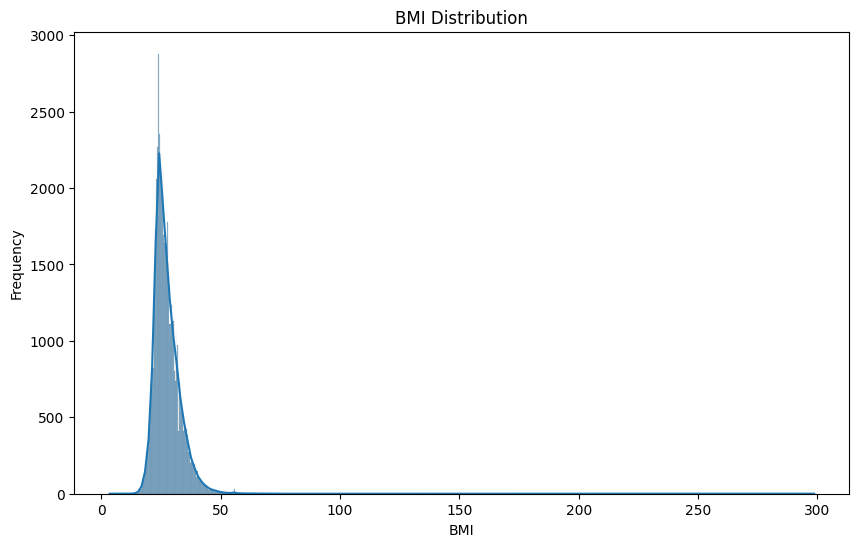

In [ ]:
# check the BMI outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the height-to-weight ratio distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Define bounds for BMI
min_bmi = 15  # Set your desired minimum BMI
max_bmi = 50  # Set your desired maximum BMI

# Remove outliers for BMI
data = data[(data['BMI'] >= min_bmi) & (data['BMI'] <= max_bmi)]

# Print the number of records after dropping outliers
print(f"Number of records after dropping BMI outliers: {len(data)}")


Number of records after dropping BMI outliers: 68514


In [ ]:
# Save the Cleaned Data to a New CSV File
data.to_csv('/content/sample_data/cardio_data_cleaned_2.csv', index=False)

# Load cleaned Data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned_2.csv')

# Print the first few rows to verify the change
print(data.describe())


             active          alco         ap_hi         ap_lo   cholesterol  \
count  68514.000000  68514.000000  68514.000000  68514.000000  68514.000000   
mean       0.803383      0.053653    126.587384     81.366859      1.364086   
std        0.397443      0.225334     16.736981      9.664295      0.678522   
min        0.000000      0.000000     60.000000     40.000000      1.000000   
25%        1.000000      0.000000    120.000000     80.000000      1.000000   
50%        1.000000      0.000000    120.000000     80.000000      1.000000   
75%        1.000000      0.000000    140.000000     90.000000      1.000000   
max        1.000000      1.000000    240.000000    190.000000      3.000000   

             gender          gluc        height         smoke        weight  \
count  68514.000000  68514.000000  68514.000000  68514.000000  68514.000000   
mean       1.349155      1.225209    164.444800      0.088143     73.977361   
std        0.476706      0.571115      7.848649    

               active      alco     ap_hi     ap_lo  cholesterol    gender  \
active       1.000000  0.025060 -0.001135  0.000148     0.009126  0.005968   
alco         0.025060  1.000000  0.032752  0.043575     0.036049  0.171004   
ap_hi       -0.001135  0.032752  1.000000  0.697198     0.193713  0.062309   
ap_lo        0.000148  0.043575  0.697198  1.000000     0.158218  0.067187   
cholesterol  0.009126  0.036049  0.193713  0.158218     1.000000 -0.035994   
gender       0.005968  0.171004  0.062309  0.067187    -0.035994  1.000000   
gluc        -0.007536  0.011356  0.091492  0.075032     0.450255 -0.020665   
height      -0.009195  0.098489  0.019518  0.037044    -0.054520  0.521100   
smoke        0.025307  0.339970  0.027182  0.024780     0.010037  0.339055   
weight      -0.018622  0.069670  0.268076  0.248132     0.141402  0.164143   
disease     -0.037446 -0.007832  0.425374  0.334932     0.221617  0.007638   
age         -0.010380 -0.029273  0.209035  0.152904     0.155246

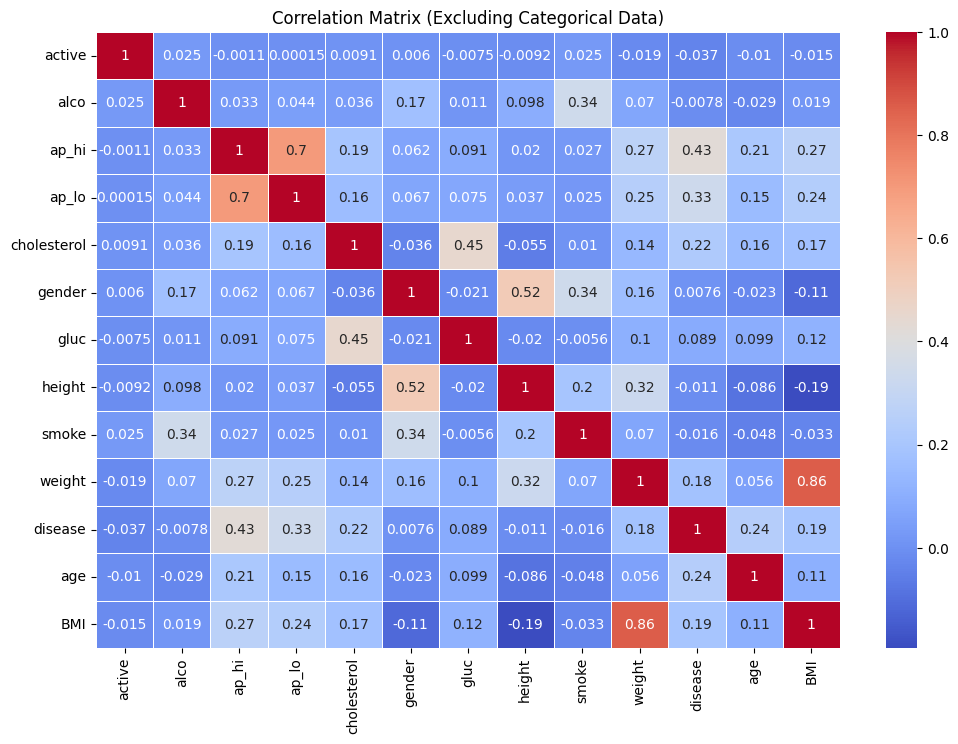

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'country' and 'occupation' columns for correlation calculation
data_numeric = data.drop(columns=['country', 'occupation'])

# Calculate the correlation matrix for numeric data
correlation_matrix = data_numeric.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Excluding Categorical Data)')
plt.show()


<ipython-input-62-4ceb1a1ddcc0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='disease', y='country', data=disease_distribution, palette='viridis')


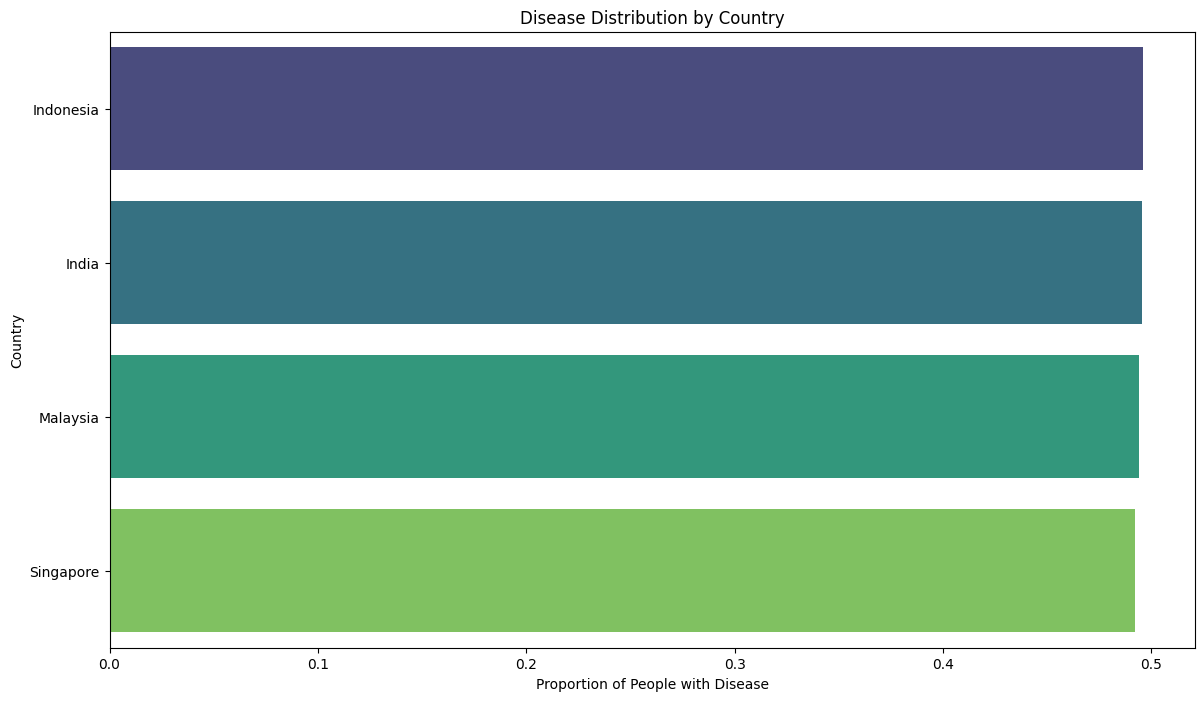

In [ ]:
# Calculate the proportion of people with the disease in each country
disease_distribution = data.groupby('country')['disease'].mean().reset_index()

# Sort by the proportion of disease for better visualization
disease_distribution = disease_distribution.sort_values(by='disease', ascending=False)

# Visualize the distribution
plt.figure(figsize=(14, 8))
sns.barplot(x='disease', y='country', data=disease_distribution, palette='viridis')
plt.title('Disease Distribution by Country')
plt.xlabel('Proportion of People with Disease')
plt.ylabel('Country')
plt.show()


<ipython-input-66-3adc71fbeb1b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_by_age_group = data.groupby('age_group')['disease'].mean().reset_index()
<ipython-input-66-3adc71fbeb1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='disease', data=disease_by_age_group, palette='magma')


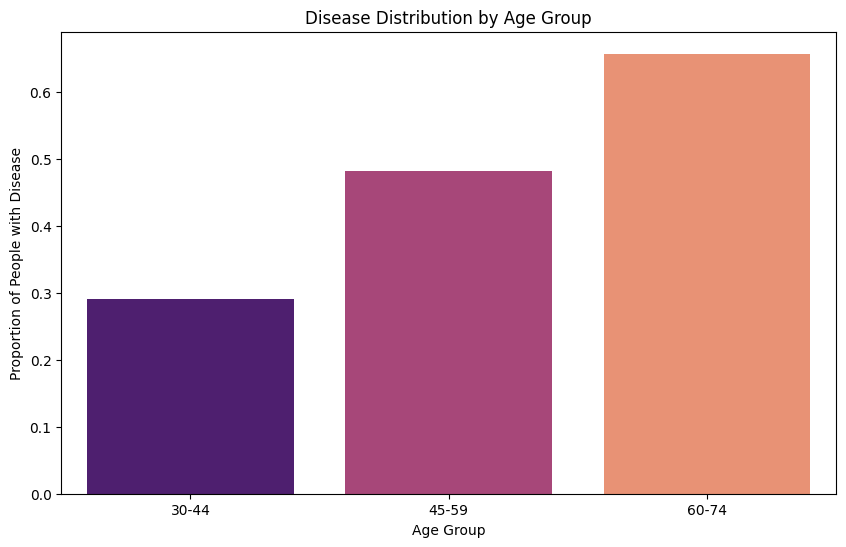

In [ ]:
# Define age groups
age_bins = [30, 45, 60, 75]
age_labels = ['30-44', '45-59', '60-74']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the proportion of people with the disease in each age group
disease_by_age_group = data.groupby('age_group')['disease'].mean().reset_index()

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='disease', data=disease_by_age_group, palette='magma')
plt.title('Disease Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of People with Disease')
plt.show()



<ipython-input-68-66eab87d1c44>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_by_age_group = data.groupby('age_group')['disease'].mean().reset_index()
<ipython-input-68-66eab87d1c44>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='age_group', y='percentage', data=disease_by_age_group, palette='magma')


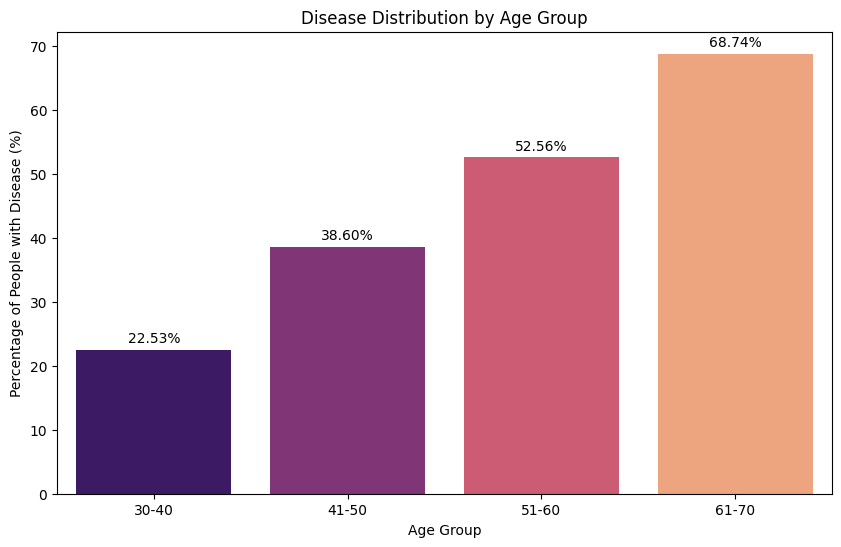

  age_group   disease  percentage
0     30-40  0.225269   22.526934
1     41-50  0.385950   38.595037
2     51-60  0.525555   52.555543
3     61-70  0.687439   68.743867


In [ ]:
# Define new age groups
age_bins = [30, 41, 51, 61, 71]
age_labels = ['30-40', '41-50', '51-60', '61-70']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the percentage of people with the disease in each age group
disease_by_age_group = data.groupby('age_group')['disease'].mean().reset_index()
disease_by_age_group['percentage'] = disease_by_age_group['disease'] * 100

# Visualize the distribution
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='age_group', y='percentage', data=disease_by_age_group, palette='magma')
plt.title('Disease Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of People with Disease (%)')

# Add percentage values on top of the bars
for i in barplot.containers:
    barplot.bar_label(i, fmt='%.2f%%', padding=3)

plt.show()

# Display the results
print(disease_by_age_group)


<ipython-input-69-86d68e04922a>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_by_ap_hi_group = data.groupby('ap_hi_group')['disease'].mean().reset_index()
<ipython-input-69-86d68e04922a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_ap_hi = sns.barplot(x='ap_hi_group', y='percentage', data=disease_by_ap_hi_group, palette='viridis')


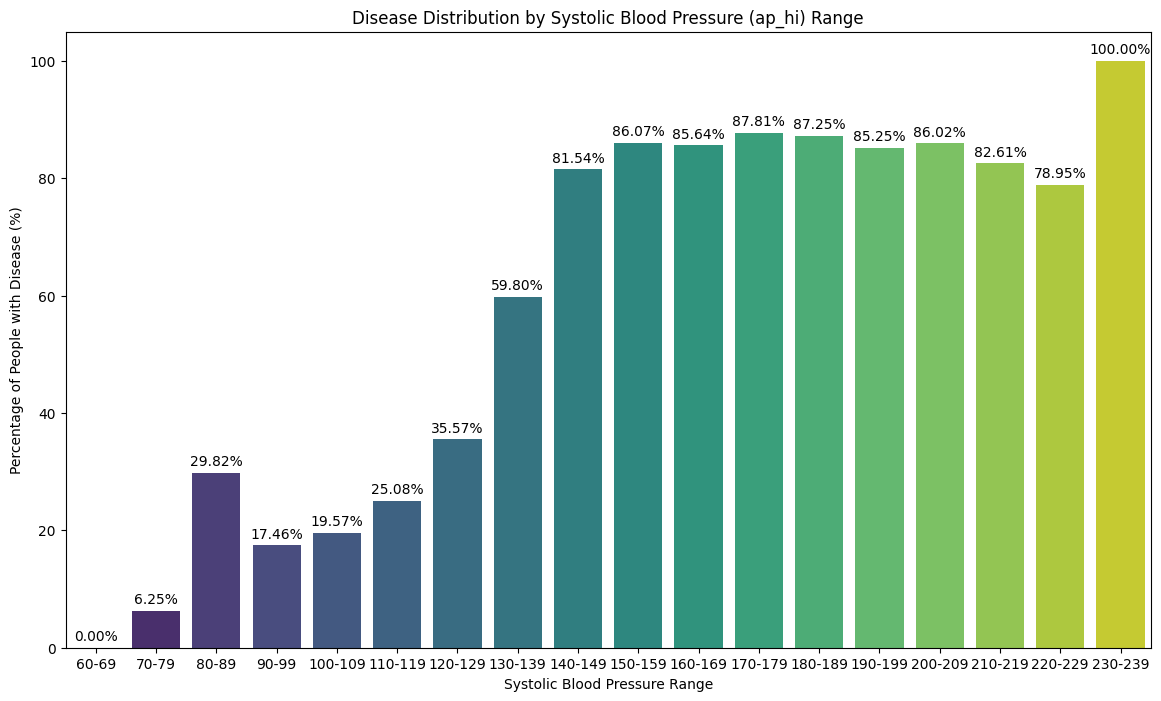

In [ ]:
# Define systolic blood pressure (ap_hi) ranges
ap_hi_bins = list(range(60, 241, 10))  # From 60 to 240 with step of 10
ap_hi_labels = [f'{x}-{x+9}' for x in ap_hi_bins[:-1]]
data['ap_hi_group'] = pd.cut(data['ap_hi'], bins=ap_hi_bins, labels=ap_hi_labels, right=False)

# Calculate the percentage of people with the disease in each systolic blood pressure range
disease_by_ap_hi_group = data.groupby('ap_hi_group')['disease'].mean().reset_index()
disease_by_ap_hi_group['percentage'] = disease_by_ap_hi_group['disease'] * 100

# Visualize the distribution for systolic blood pressure
plt.figure(figsize=(14, 8))
barplot_ap_hi = sns.barplot(x='ap_hi_group', y='percentage', data=disease_by_ap_hi_group, palette='viridis')
plt.title('Disease Distribution by Systolic Blood Pressure (ap_hi) Range')
plt.xlabel('Systolic Blood Pressure Range')
plt.ylabel('Percentage of People with Disease (%)')

# Add percentage values on top of the bars
for i in barplot_ap_hi.containers:
    barplot_ap_hi.bar_label(i, fmt='%.2f%%', padding=3)

plt.show()


<ipython-input-70-25c2a39d1213>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_by_ap_lo_group = data.groupby('ap_lo_group')['disease'].mean().reset_index()
<ipython-input-70-25c2a39d1213>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_ap_lo = sns.barplot(x='ap_lo_group', y='percentage', data=disease_by_ap_lo_group, palette='plasma')


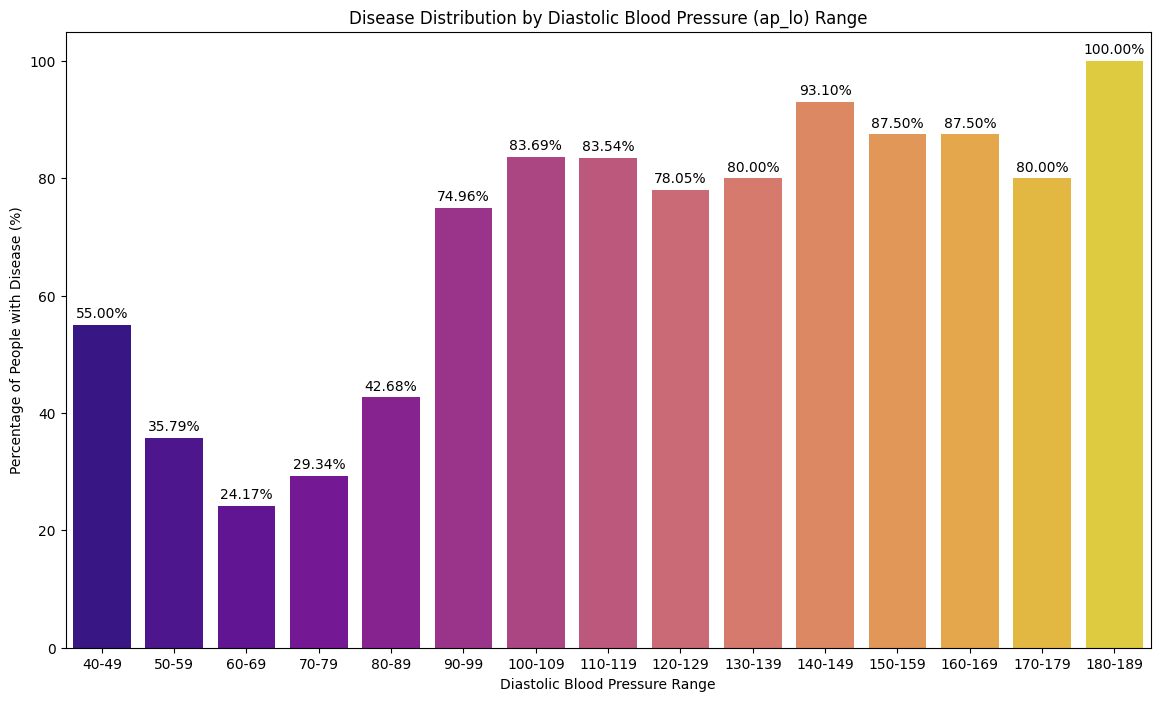

In [ ]:
# Define diastolic blood pressure (ap_lo) ranges
ap_lo_bins = list(range(40, 191, 10))  # From 40 to 190 with step of 10
ap_lo_labels = [f'{x}-{x+9}' for x in ap_lo_bins[:-1]]
data['ap_lo_group'] = pd.cut(data['ap_lo'], bins=ap_lo_bins, labels=ap_lo_labels, right=False)

# Calculate the percentage of people with the disease in each diastolic blood pressure range
disease_by_ap_lo_group = data.groupby('ap_lo_group')['disease'].mean().reset_index()
disease_by_ap_lo_group['percentage'] = disease_by_ap_lo_group['disease'] * 100

# Visualize the distribution for diastolic blood pressure
plt.figure(figsize=(14, 8))
barplot_ap_lo = sns.barplot(x='ap_lo_group', y='percentage', data=disease_by_ap_lo_group, palette='plasma')
plt.title('Disease Distribution by Diastolic Blood Pressure (ap_lo) Range')
plt.xlabel('Diastolic Blood Pressure Range')
plt.ylabel('Percentage of People with Disease (%)')

# Add percentage values on top of the bars
for i in barplot_ap_lo.containers:
    barplot_ap_lo.bar_label(i, fmt='%.2f%%', padding=3)

plt.show()


<ipython-input-71-154ae51d1f3e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_activity = sns.barplot(x='active', y='percentage', data=disease_by_activity, palette='coolwarm')


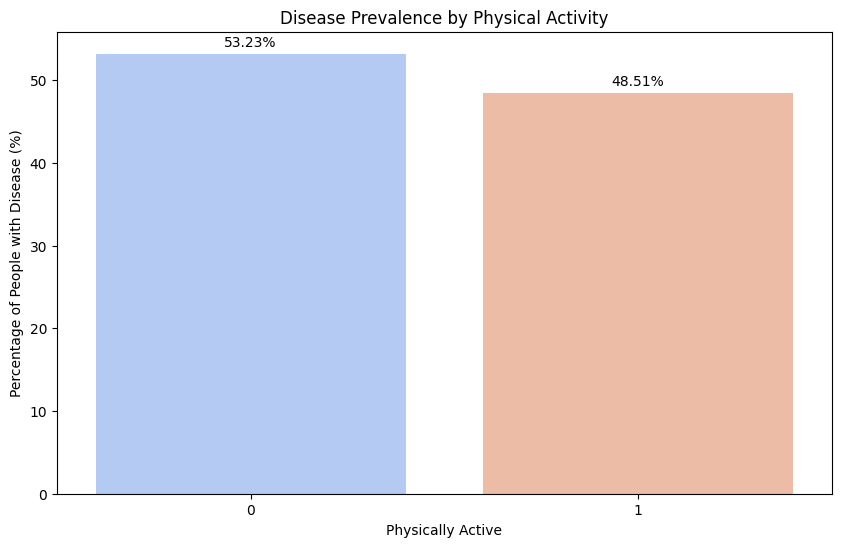

   active   disease  percentage
0       0  0.532254   53.225447
1       1  0.485148   48.514798


In [ ]:
# Calculate the percentage of people with the disease for each activity status
disease_by_activity = data.groupby('active')['disease'].mean().reset_index()
disease_by_activity['percentage'] = disease_by_activity['disease'] * 100

# Visualize the distribution
plt.figure(figsize=(10, 6))
barplot_activity = sns.barplot(x='active', y='percentage', data=disease_by_activity, palette='coolwarm')
plt.title('Disease Prevalence by Physical Activity')
plt.xlabel('Physically Active')
plt.ylabel('Percentage of People with Disease (%)')

# Add percentage values on top of the bars
for i in barplot_activity.containers:
    barplot_activity.bar_label(i, fmt='%.2f%%', padding=3)

plt.show()

# Display the results
print(disease_by_activity)


<ipython-input-74-3ddabe18c5d3>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_by_BMI_group = data.groupby('BMI_group')['disease'].mean().reset_index()
<ipython-input-74-3ddabe18c5d3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_bmi = sns.barplot(x='BMI_group', y='percentage', data=disease_by_BMI_group, palette='inferno')


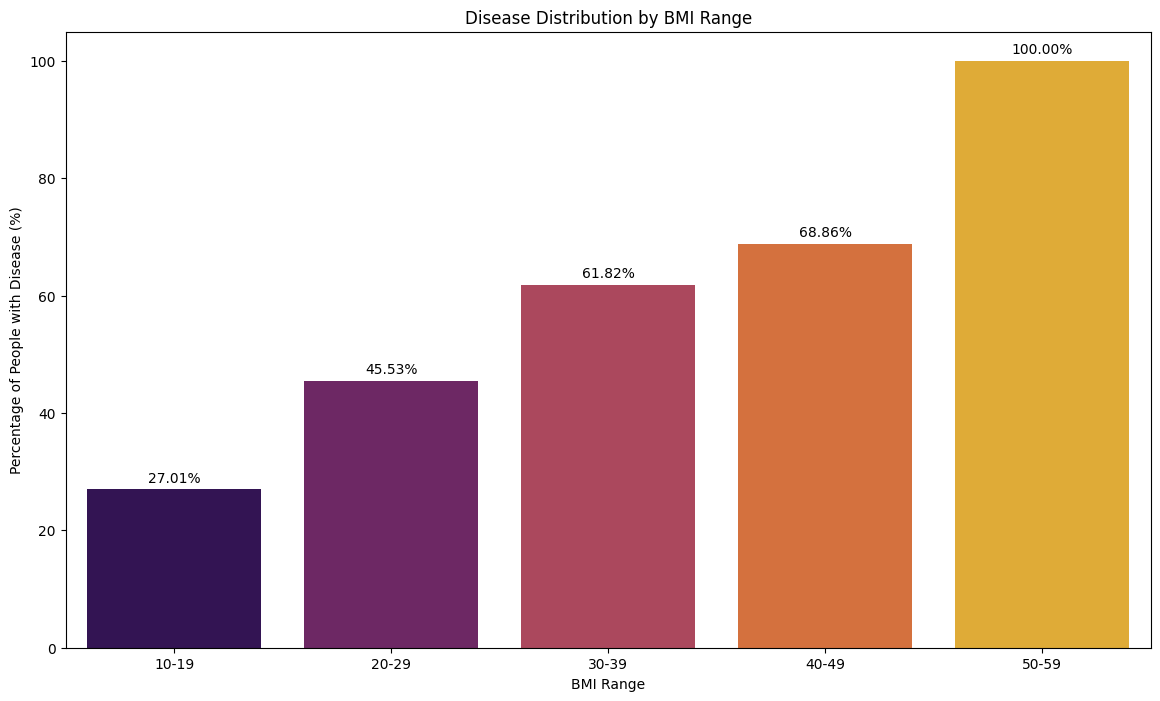

  BMI_group   disease  percentage
0     10-19  0.270121   27.012128
1     20-29  0.455306   45.530618
2     30-39  0.618212   61.821204
3     40-49  0.688608   68.860759
4     50-59  1.000000  100.000000


In [ ]:
# Define BMI ranges
bmi_bins = list(range(10, 61, 10))  # From 10 to 60 with steps of 10
bmi_labels = [f'{x}-{x+9}' for x in bmi_bins[:-1]]
data['BMI_group'] = pd.cut(data['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

# Calculate the percentage of people with the disease in each BMI range
disease_by_BMI_group = data.groupby('BMI_group')['disease'].mean().reset_index()
disease_by_BMI_group['percentage'] = disease_by_BMI_group['disease'] * 100

# Visualize the distribution for BMI
plt.figure(figsize=(14, 8))
barplot_bmi = sns.barplot(x='BMI_group', y='percentage', data=disease_by_BMI_group, palette='inferno')
plt.title('Disease Distribution by BMI Range')
plt.xlabel('BMI Range')
plt.ylabel('Percentage of People with Disease (%)')

# Add percentage values on top of the bars
for i in barplot_bmi.containers:
    barplot_bmi.bar_label(i, fmt='%.2f%%', padding=3)

plt.show()

# Display the results
print(disease_by_BMI_group)


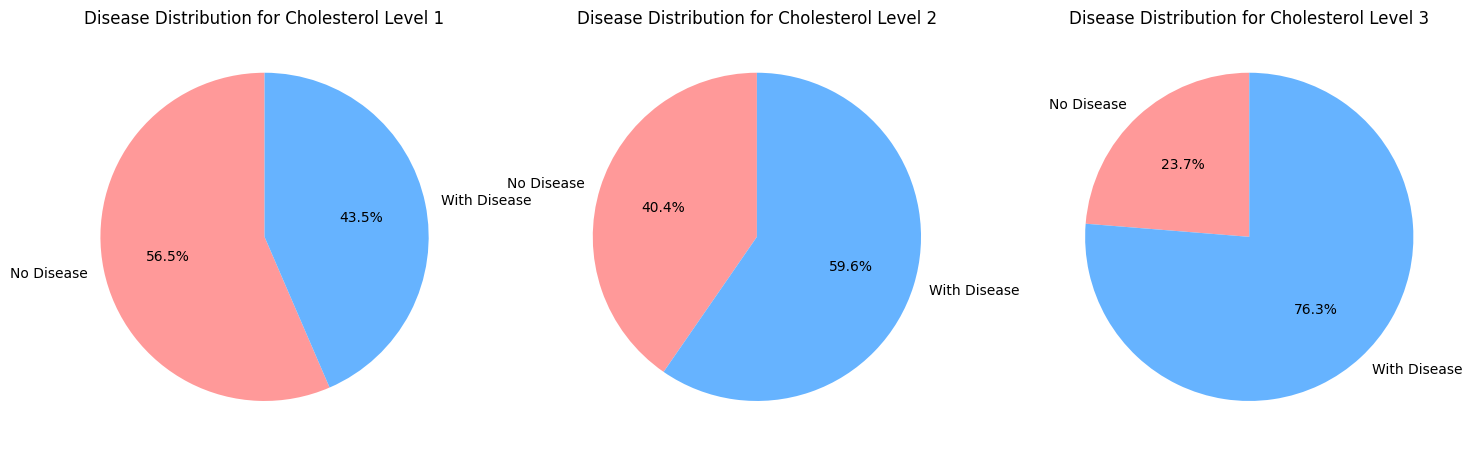

In [ ]:
# Update disease labels
data['disease'] = data['disease'].replace({0: 'No Disease', 1: 'With Disease'})

# Define cholesterol categories as is
cholesterol_labels = ['Level 1', 'Level 2', 'Level 3']
data['cholesterol_group'] = data['cholesterol'].replace({1: 'Level 1', 2: 'Level 2', 3: 'Level 3'})

# Calculate the percentage of people with and without the disease in each cholesterol category
cholesterol_disease = data.groupby(['cholesterol_group', 'disease']).size().unstack(fill_value=0)
cholesterol_disease = cholesterol_disease.apply(lambda x: x/x.sum() * 100, axis=1)

# Plot pie charts for each cholesterol level
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (level, row) in zip(axes, cholesterol_disease.iterrows()):
    row.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'], labels=row.index)
    ax.set_ylabel('')
    ax.set_title(f'Disease Distribution for Cholesterol {level}')

plt.show()


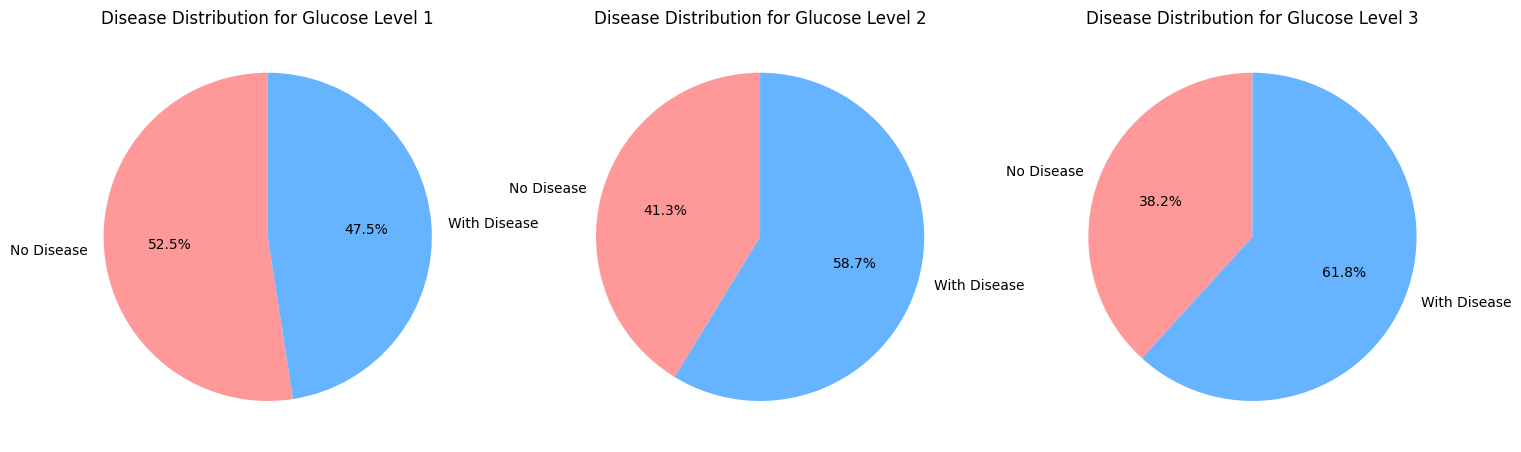

In [ ]:
# Define glucose categories as is
glucose_labels = ['Level 1', 'Level 2', 'Level 3']
data['glucose_group'] = data['gluc'].replace({1: 'Level 1', 2: 'Level 2', 3: 'Level 3'})

# Calculate the percentage of people with and without the disease in each glucose category
glucose_disease = data.groupby(['glucose_group', 'disease']).size().unstack(fill_value=0)
glucose_disease = glucose_disease.apply(lambda x: x/x.sum() * 100, axis=1)

# Plot pie charts for each glucose level
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (level, row) in zip(axes, glucose_disease.iterrows()):
    row.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'], labels=row.index)
    ax.set_ylabel('')
    ax.set_title(f'Disease Distribution for Glucose {level}')

plt.show()


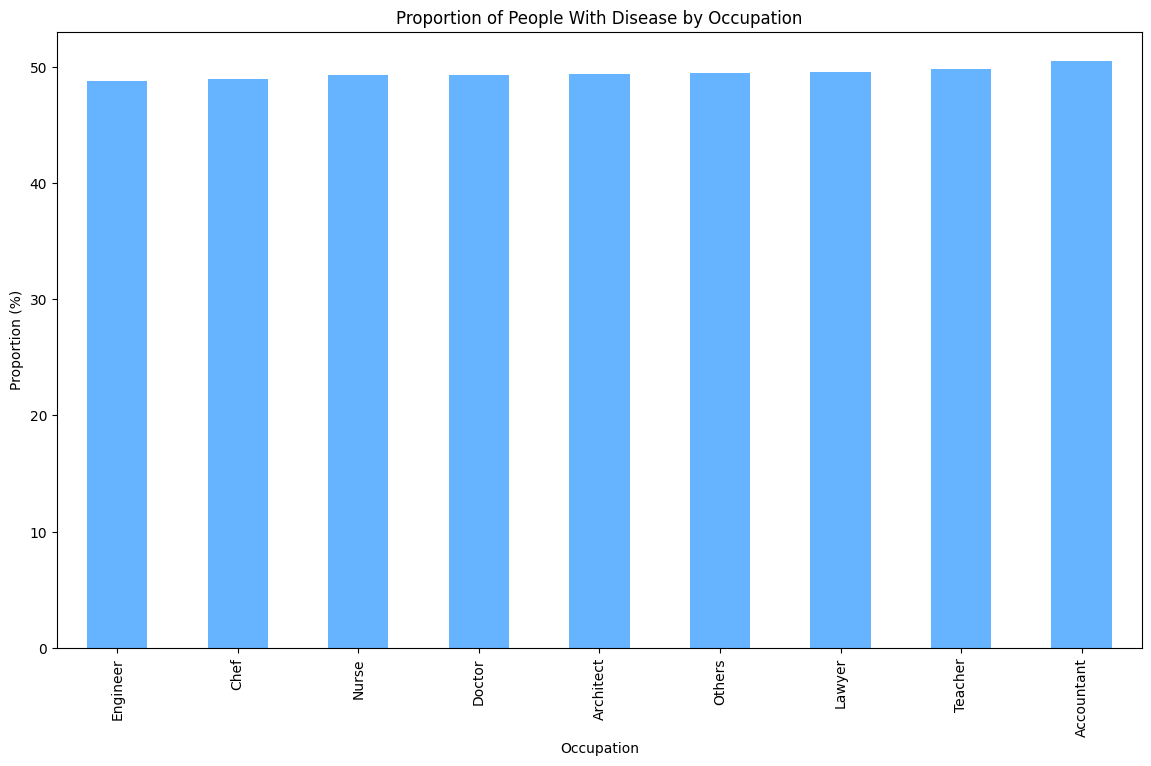

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned_2.csv')

# Update disease labels (temporarily keeping the numeric format for calculations)
data['disease_numeric'] = data['disease'].replace({'No Disease': 0, 'With Disease': 1})

# Calculate the proportion of people with the disease in each occupation category
occupation_disease_proportion = data.groupby('occupation')['disease_numeric'].mean() * 100

# Sort the values for better visualization
occupation_disease_proportion = occupation_disease_proportion.sort_values()

# Plot a bar chart
fig, ax = plt.subplots(figsize=(14, 8))
occupation_disease_proportion.plot(kind='bar', ax=ax, color='#66b3ff')
ax.set_title('Proportion of People With Disease by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Proportion (%)')

plt.show()


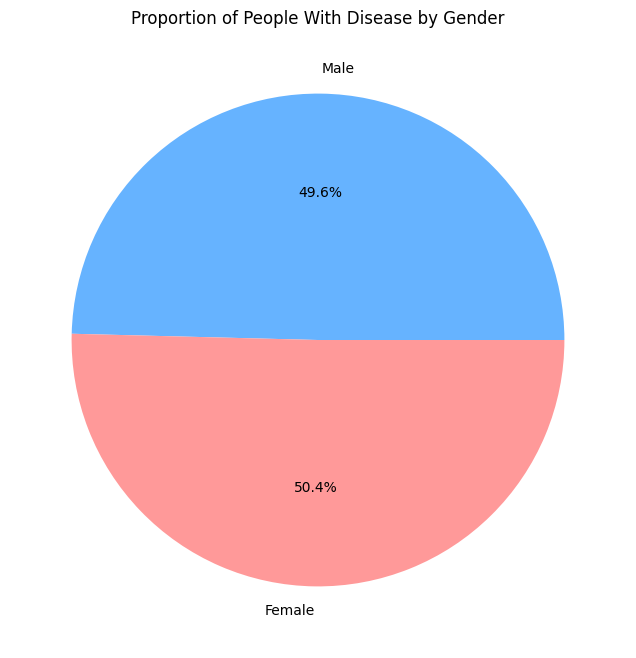

In [ ]:
import matplotlib.pyplot as plt

# Calculate the proportion of people with the disease by gender
gender_disease_proportion = data.groupby('gender')['disease_numeric'].mean() * 100

# Convert gender to readable labels
gender_labels = {1: 'Male', 2: 'Female'}
gender_disease_proportion.index = gender_disease_proportion.index.map(gender_labels)

# Plot a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gender_disease_proportion, labels=gender_disease_proportion.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
ax.set_title('Proportion of People With Disease by Gender')

plt.show()


In [ ]:
# Filter the data
subset = data[(data['smoke'] == 1) & (data['alco'] == 1) & (data['active'] == 1)]

# Calculate the proportion of people with the disease in this subgroup
disease_proportion = subset['disease_numeric'].mean() * 100

# Print the result
print(f'Proportion of People With Disease in Subgroup (smoke=1, alco=1, active=1): {disease_proportion:.2f}%')


Proportion of People With Disease in Subgroup (smoke=1, alco=1, active=1): 42.02%


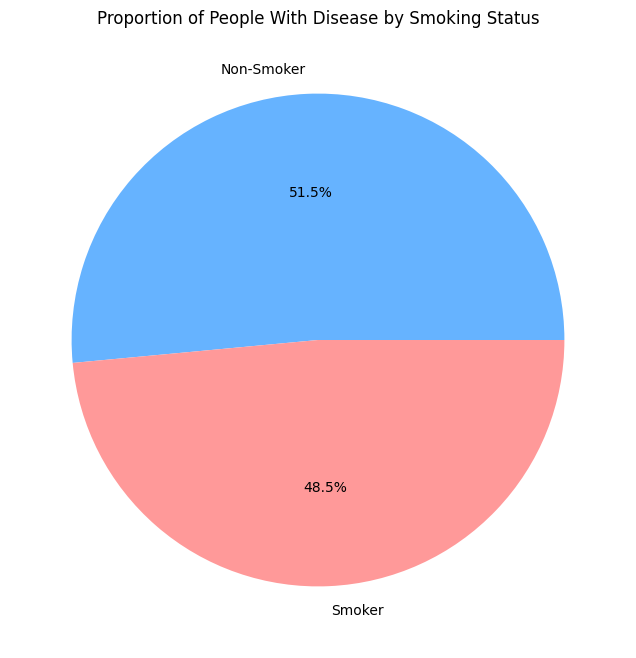

In [ ]:
# Calculate the proportion of people with the disease by smoking status
smoke_disease_proportion = data.groupby('smoke')['disease_numeric'].mean() * 100

# Convert smoke to readable labels
smoke_labels = {0: 'Non-Smoker', 1: 'Smoker'}
smoke_disease_proportion.index = smoke_disease_proportion.index.map(smoke_labels)

# Plot a pie chart for smoking
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(smoke_disease_proportion, labels=smoke_disease_proportion.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
ax.set_title('Proportion of People With Disease by Smoking Status')

plt.show()


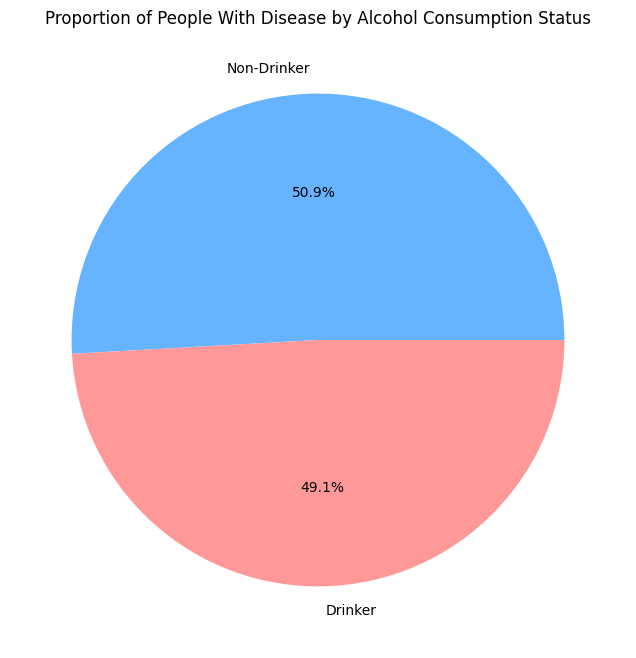

In [ ]:
# Calculate the proportion of people with the disease by alcohol consumption status
alco_disease_proportion = data.groupby('alco')['disease_numeric'].mean() * 100

# Convert alcohol consumption to readable labels
alco_labels = {0: 'Non-Drinker', 1: 'Drinker'}
alco_disease_proportion.index = alco_disease_proportion.index.map(alco_labels)

# Plot a pie chart for alcohol consumption
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(alco_disease_proportion, labels=alco_disease_proportion.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
ax.set_title('Proportion of People With Disease by Alcohol Consumption Status')

plt.show()


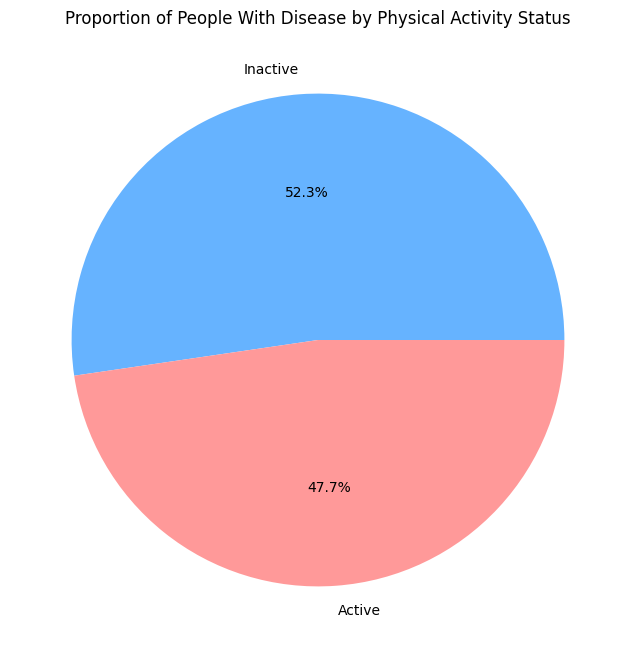

In [ ]:
# Calculate the proportion of people with the disease by physical activity status
active_disease_proportion = data.groupby('active')['disease_numeric'].mean() * 100

# Convert physical activity to readable labels
active_labels = {0: 'Inactive', 1: 'Active'}
active_disease_proportion.index = active_disease_proportion.index.map(active_labels)

# Plot a pie chart for physical activity
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(active_disease_proportion, labels=active_disease_proportion.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
ax.set_title('Proportion of People With Disease by Physical Activity Status')

plt.show()


In [88]:
# Prediction Section

import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned_2.csv')

#Step 1. Prepare the Data
# Select the relevant features for the model
features = ['age', 'ap_hi', 'ap_lo', 'BMI', 'cholesterol', 'gluc', 'active', 'smoke', 'alco']

# Sample a subset of the data
data = data.sample(n=10000, random_state=42)

X = data[features]
y = data['disease']

In [89]:
#Step 2. Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sample a subset of the data
#data = data.sample(n=10000, random_state=42)

# Select features and target
#X_sample = sample_data[features]
#y_sample = sample_data['disease']

# Split the sample data into training and testing sets
#X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Proceed with model training and evaluation as shown earlier


In [90]:
#Step 3. Train a Machine Learning Model
# Model1 used: Random Forest Classifier, which is a robust model for classification tasks.
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
#Step 4. Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.70
Confusion Matrix:
[[1085  441]
 [ 469 1005]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1526
           1       0.70      0.68      0.69      1474

    accuracy                           0.70      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.70      0.70      0.70      3000



<Axes: >

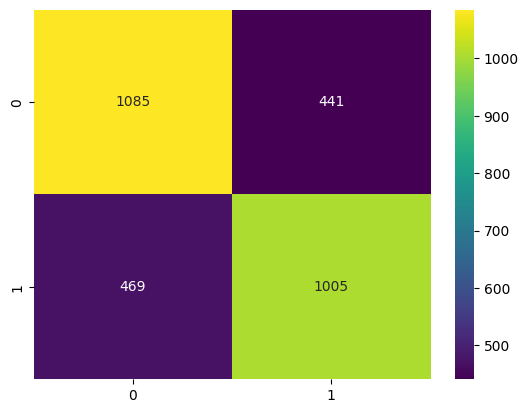

In [92]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='d')


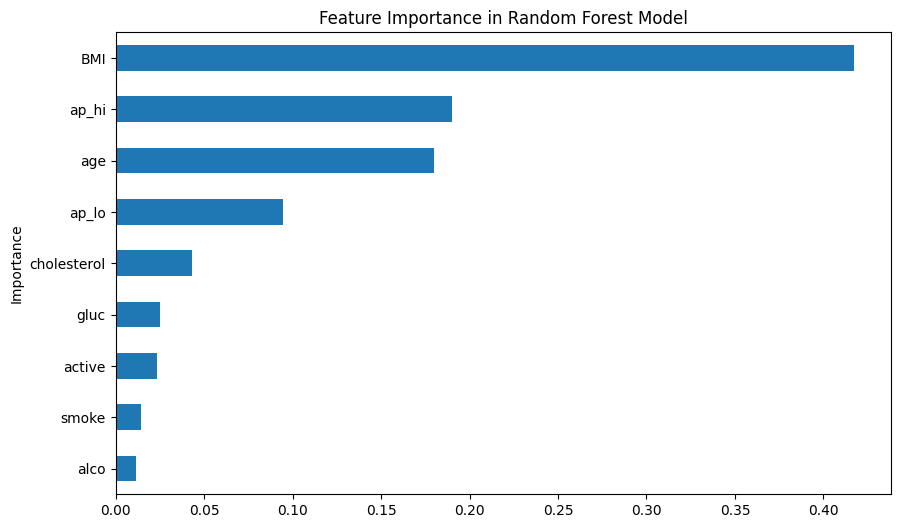

In [95]:
#Step 5. Interpret the Model

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh')
plt.title('Feature Importance in Random Forest Model')
plt.ylabel('Importance')
plt.gca().invert_yaxis() # To display the highest importance at the top
plt.show()


In [70]:
# Model2 used: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_logistic))
print('Classification Report:')
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.73
Confusion Matrix:
[[1229  297]
 [ 512  962]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      1526
           1       0.76      0.65      0.70      1474

    accuracy                           0.73      3000
   macro avg       0.74      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000



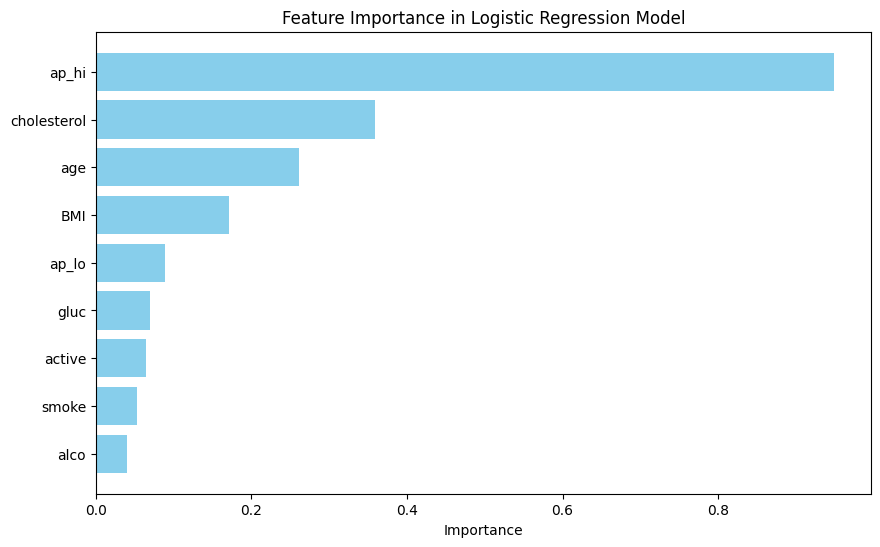

In [71]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


In [72]:
# Model3 used: Support Vector Machine (SVM)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))
print('Classification Report:')
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.74
Confusion Matrix:
[[1274  252]
 [ 532  942]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      1526
           1       0.79      0.64      0.71      1474

    accuracy                           0.74      3000
   macro avg       0.75      0.74      0.74      3000
weighted avg       0.75      0.74      0.74      3000



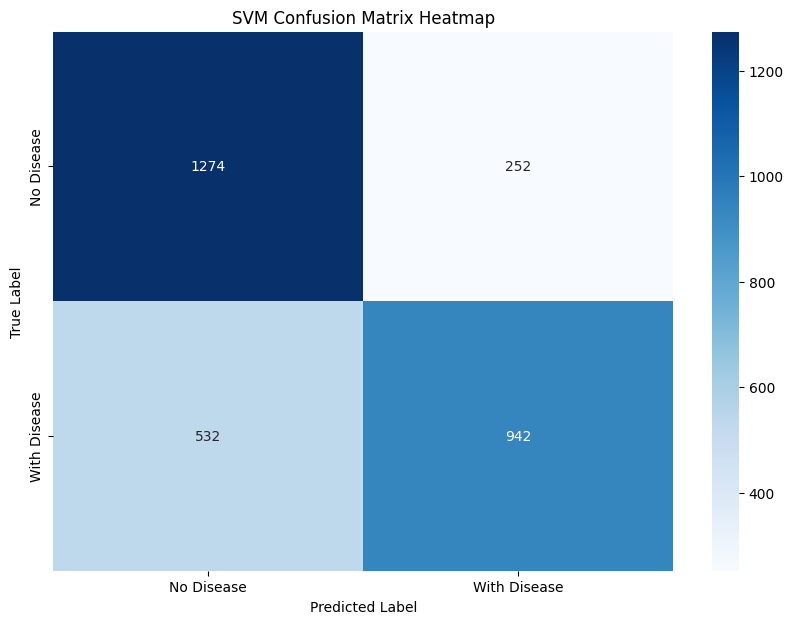

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'With Disease'], yticklabels=['No Disease', 'With Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix Heatmap')
plt.show()


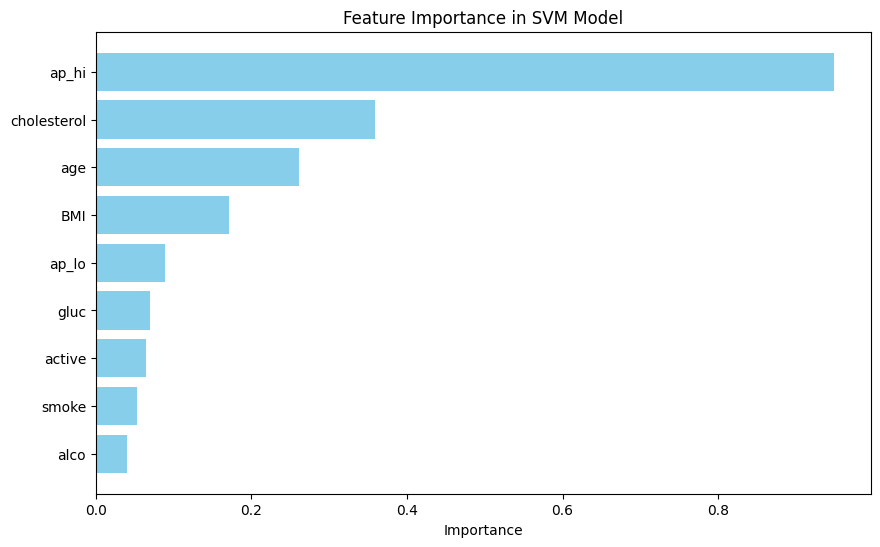

In [78]:
import matplotlib.pyplot as plt

# Extract feature importance (coefficients)
feature_importance = abs(svm_model.coef_[0])
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in SVM Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


In [79]:
# Model4 used: Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nb))
print('Classification Report:')
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.72
Confusion Matrix:
[[1257  269]
 [ 574  900]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1526
           1       0.77      0.61      0.68      1474

    accuracy                           0.72      3000
   macro avg       0.73      0.72      0.71      3000
weighted avg       0.73      0.72      0.72      3000



In [84]:
# Combine training features and target into a single DataFrame
train_data = pd.DataFrame(X_train, columns=features)
train_data['disease'] = y_train.values

# Calculate mean of each feature by class
feature_means = train_data.groupby('disease').mean()


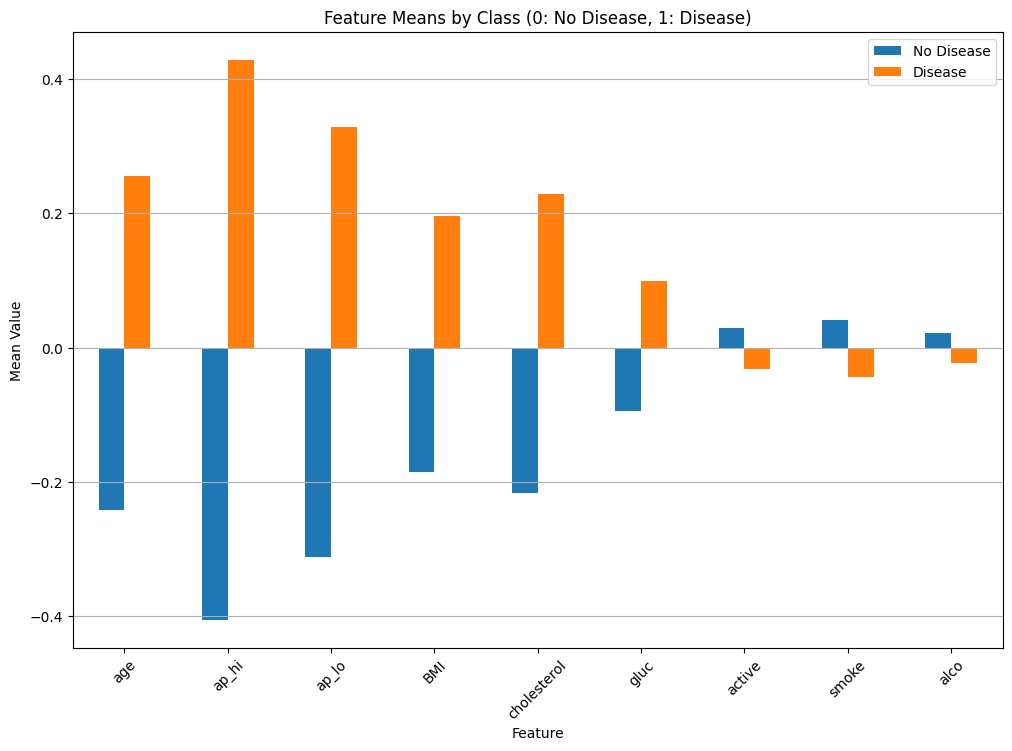

In [85]:
# Plot the mean values for each feature
feature_means.T.plot(kind='bar', figsize=(12, 8))
plt.title('Feature Means by Class (0: No Disease, 1: Disease)')
plt.ylabel('Mean Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.legend(['No Disease', 'Disease'])
plt.grid(axis='y')
plt.show()


In [86]:
# Compare the models

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Naive Bayes': GaussianNB()
}


In [87]:
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.733667   0.766377  0.658752  0.708501
1        Random Forest  0.696000   0.692995  0.684532  0.688737
2                  SVM  0.738667   0.788945  0.639077  0.706147
3          Naive Bayes  0.719000   0.769889  0.610583  0.681044


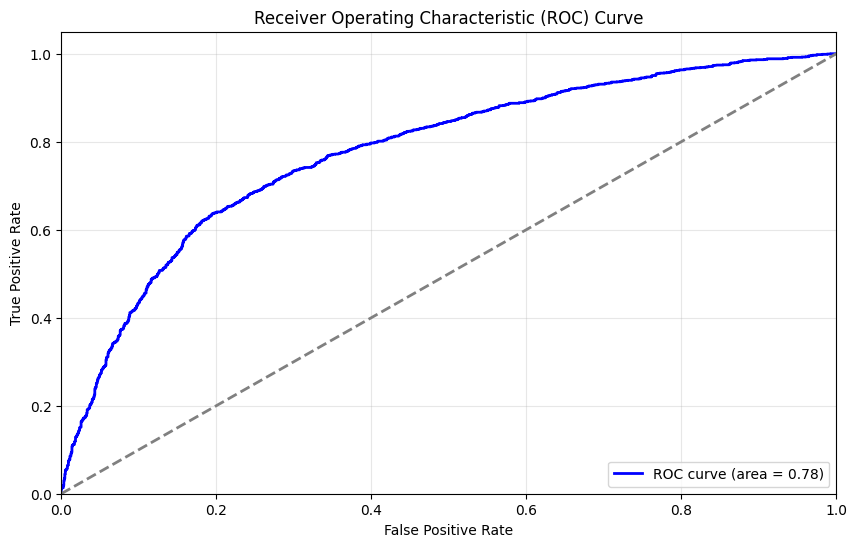

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Load your data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned_2.csv')

#Step 1. Prepare the Data
# Select the relevant features for the model
features = ['age', 'ap_hi', 'ap_lo', 'BMI', 'cholesterol', 'gluc', 'active', 'smoke', 'alco']

# Sample a subset of the data
data = data.sample(n=10000, random_state=42)

X = data[features]
y = data['disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Naive Bayes model (or any classifier)
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
